# Unidad 5 - Actividad 1
# Materia: **Análisis de Algoritmos y Estructuras para Datos Masivos**
# Alumno: **Luis Fernando Izquierdo Berdugo**
# Fecha: **25 de Septiembre de 2024**

Considere los siguientes datos para los experimentos:
- REAL: Datos reales, puede usar listas-posteo-100.json o puede generarlos (vea Unidad 2). Leer la primera lista de posteo (tamaño ~41328 datos, es la etiquetada con "_url")
- SIN8: Datos sintéticos con diferencias aleatorias entre 1 y 8, $n=10^7$
- SIN64: Datos sintéticos con diferencias aleatorias entre 1 y 64, $n=10^7$
- SIN1024: Datos sintéticos con diferencias aleatorias entre 1 y 1024, $n=10^7$

1. Representación de Diferencias en Listas de Posteo:

- Calcule las diferencias entre entradas contiguas en cada lista de posteo. Estas serán la base para los pasos de compresión subsiguientes.

2. Compresión de Diferencias:

- Aplique las técnicas de compresión Elias-$\gamma$ y Elias-$\delta$ a las diferencias.
- Utilice las codificaciones inducidas por los algoritmos de búsqueda B1 y B2, basándose en los identificadores de las diferencias contiguas.

3. Comparación de Tiempos de Compresión y Descompresión:

- Mida y registre los tiempos de compresión y descompresión para cada conjunto de datos y método de codificación.
- Elabore un gráfico para comparar estos tiempos. Use diferentes colores o estilos de línea para distinguir entre métodos.

4. Comparación del Ratio de Compresión:

- Calcule y compare el ratio de compresión para cada conjunto de datos y método de codificación.
- Realice un gráfico para visualizar estos ratios, con los métodos de codificación en el eje horizontal y los ratios en el vertical.

5. Análisis de los Resultados Observados en las Gráficas:

- Analice detalladamente los resultados mostrados en los gráficos. Identifique tendencias, patrones y anomalías.
- Compare el desempeño de los métodos de codificación en términos de eficiencia de compresión y tiempo de procesamiento.
- Discuta las implicaciones de estos resultados. Por ejemplo, ¿qué método ofrece el mejor equilibrio entre tiempo de compresión y ratio de compresión?
- Considere cualquier factor externo o limitación que podría haber influido en los resultados.

Las comparaciones deberán realizarse mediante figuras y tablas que resuman la información.



## Inciso 1 - Lectura y cálculo de diferencias

In [43]:
import json

def openLists(route):
    with open(f'{route}') as file:
        for line in file:
            data = json.loads(line)
            key, values = data
            if key == '_url':
                return values

def opendiff(route):
    with open(f'{route}') as file:
        for line in file:
            data = json.loads(line)
        return data
    
_url = openLists('listas-posteo-100.json')
d8 = opendiff('/Users/izluis/Documents/diff-8.json')
d64 = opendiff('/Users/izluis/Documents/diff-64.json')
d1024 = opendiff('/Users/izluis/Documents/diff-1024.json')


In [44]:
def calcDiff(lista):
    diff = []
    for i in range(len(lista)-1):
        val = lista[i+1] - lista[i]
        diff.append(val)
    return diff

diffUrl = calcDiff(_url)
diff8 = calcDiff(d8)
diff64 = calcDiff(d64)
diff1024 = calcDiff(d1024)

## Inciso 2

In [45]:
import numpy as np

def eliasGammaE(num):
    binario = bin(num)[2:]
    length = len(binario)
    prefix_unario = "0" * (length-1)   
    return prefix_unario + binario

def eliasGammaD(num):
    zeroCount = num.find("1")
    binary_representation = num[zeroCount :]
    decoded_integer = int(binary_representation, 2)
    return decoded_integer


In [46]:
from math import floor, log, pow, ceil, log2
def Binary_Representation_Without_MSB(x):
    binary = "{0:b}".format(int(x))
    binary_without_MSB = binary[1:]
    return binary_without_MSB

def eliasDeltaE(k):
    Gamma = eliasGammaE(1 + floor(log(k, 2)))
    binary_without_MSB = Binary_Representation_Without_MSB(k)
    return Gamma+binary_without_MSB

def eliasDeltaD(x):
	x = list(x) 
	L=0
	while True: 
		if not x[L] == '0': 
			break
		L= L + 1
	
	x=x[2*L+1:] 
	
	x.insert(0,'1') 
	x.reverse() 
	n=0
	
	for i in range(len(x)): 
		if x[i]=='1': 
			n=n+pow(2,i) 
	return int(n) 

In [47]:
class BitStream:
    def __init__(self):
        self.arr = []
        self.i = 0
    
    def __len__(self):
        return len(self.arr)

    def write(self, b):
        self.arr.append(b)

    def read(self):
        b = self.arr[self.i]
        self.i += 1
        return b

        
def unary_encoding(A, x):
    for i in range(1, x):
        A.write(1)
    A.write(0)
    return A

def unary_decoding(A):
    i = 1
    while A.read():
        i += 1
    return i


In [48]:
def binaryEncoding(A, x, nbits):
    sp = 0
    ep = (1 << nbits) - 1
    while sp < ep:
        mid = (sp + ep) // 2
        if x <= mid:
            A.write(0)
            ep = mid
        else:
            A.write(1)
            sp = mid + 1
    return A

def binaryDecoding(A, nbits):
    v = 0
    for i in range(1, nbits + 1):
        if A.read():
            v = (v << 1) | 1
        else:
            v <<= 1
    return v

test = BitStream()
binaryEncoding(test, 13, 5)
print(binaryDecoding(test, 5))

13


In [49]:
def b1Encoding(A, x):
    p = 0
    i = 1

    while i < x:
        p = i
        i += i
        A.write(1)

    A.write(0)
    x = x - p - 1
    binaryEncoding(A, x, ceil(log2(i - p)))

def b1Decoding(A):
    i = 0
    while A.read():
        i += 1

    if i >= 1:
        i -= 1
        return (1 << i) + binaryDecoding(A, i) + 1
    else:
        return binaryDecoding(A, i) + 1

test = BitStream()
b1Encoding(test, 1)
print(b1Decoding(test))

1


## Inciso 3

In [50]:
import time

def timeB1(A, lista):
    timeE = []
    timeD = []
    sizeE = []
    for diff in lista:
        startEnc = time.process_time()
        b1Encoding(A,diff)
        sizeE.append(len(A))
        endEnc = time.process_time()
        timeE.append(endEnc-startEnc)
        startDec = time.process_time()
        b1Decoding(A)
        endDec = time.process_time()
        timeD.append(endDec-startDec)
    promEnc = sum(timeE)
    promDec = sum(timeD)
    return promEnc, promDec, sizeE
        
def timeElias(lista, function):
    times = []
    encode = []
    for diff in lista:
        startEnc = time.process_time()
        encode.append(function(diff))
        endEnc = time.process_time()
        times.append(endEnc-startEnc)
    prom = sum(times)
    return prom, encode
        


In [51]:
urlGammaE, urlGammaElistaCod = timeElias(diffUrl, eliasGammaE)
urlGammaD, listaDec = timeElias(urlGammaElistaCod, eliasGammaD)
print(f"El tiempo de Codificación de la lista _url para Elias Gamma es: {urlGammaE}")
print(f"El tiempo de Decodificación de la lista _url para Elias Gamma es: {urlGammaD}")
urlDeltaE, urlDeltaElistaCod = timeElias(diffUrl, eliasDeltaE)
urlDeltaD, listaDec = timeElias(urlDeltaElistaCod, eliasDeltaD)
print(f"El tiempo de Codificación de la lista _url para Elias Delta es: {urlDeltaE}")
print(f"El tiempo de Decodificación de la lista _url para Elias Delta es: {urlDeltaD}")

GammaE8, GammaE8listaCod = timeElias(diff8, eliasGammaE)
GammaD8, listaDec = timeElias(GammaE8listaCod, eliasGammaD)
print(f"El tiempo de Codificación de la lista diff-8 para Elias Gamma es: {GammaE8}")
print(f"El tiempo de Decodificación de la lista diff-8 para Elias Gamma es: {GammaD8}")
DeltaE8, DeltaE8listaCod = timeElias(diff8, eliasDeltaE)
DeltaD8, listaDec = timeElias(DeltaE8listaCod, eliasDeltaD)
print(f"El tiempo de Codificación de la lista diff-8 para Elias Delta es: {DeltaE8}")
print(f"El tiempo de Decodificación de la lista diff-8 para Elias Delta es: {DeltaD8}")

GammaE64, GammaE64listaCod = timeElias(diff64, eliasGammaE)
GammaD64, listaDec = timeElias(GammaE64listaCod, eliasGammaD)
print(f"El tiempo de Codificación de la lista diff-64 para Elias Gamma es: {GammaE64}")
print(f"El tiempo de Decodificación de la lista diff-64 para Elias Gamma es: {GammaD64}")
DeltaE64, DeltaE64listaCod = timeElias(diff64, eliasDeltaE)
DeltaD64, listaDec = timeElias(DeltaE64listaCod, eliasDeltaD)
print(f"El tiempo de Codificación de la lista diff-64 para Elias Delta es: {DeltaE64}")
print(f"El tiempo de Decodificación de la lista diff-64 para Elias Delta es: {DeltaD64}")

GammaE1024, GammaE1024listaCod = timeElias(diff1024, eliasGammaE)
GammaD1024, listaDec = timeElias(GammaE1024listaCod, eliasGammaD)
print(f"El tiempo de Codificación de la lista diff-1024 para Elias Gamma es: {GammaE1024}")
print(f"El tiempo de Decodificación de la lista diff-1024 para Elias Gamma es: {GammaD1024}")
DeltaE1024, DeltaE1024listaCod = timeElias(diff1024, eliasDeltaE)
DeltaD1024, listaDec = timeElias(DeltaE1024listaCod, eliasDeltaD)
print(f"El tiempo de Codificación de la lista diff-1024 para Elias Delta es: {DeltaE1024}")
print(f"El tiempo de Decodificación de la lista diff-1024 para Elias Delta es: {DeltaD1024}")

El tiempo de Codificación de la lista _url para Elias Gamma es: 0.052012000000217995
El tiempo de Decodificación de la lista _url para Elias Gamma es: 0.051687000001265915
El tiempo de Codificación de la lista _url para Elias Delta es: 0.07849699999746917
El tiempo de Decodificación de la lista _url para Elias Delta es: 0.07403099999544338
El tiempo de Codificación de la lista diff-8 para Elias Gamma es: 12.686417000049573
El tiempo de Decodificación de la lista diff-8 para Elias Gamma es: 13.059610000030943
El tiempo de Codificación de la lista diff-8 para Elias Delta es: 20.27107700003296
El tiempo de Decodificación de la lista diff-8 para Elias Delta es: 19.773195999960535
El tiempo de Codificación de la lista diff-64 para Elias Gamma es: 12.80801600000143
El tiempo de Decodificación de la lista diff-64 para Elias Gamma es: 13.046384999949055
El tiempo de Codificación de la lista diff-64 para Elias Delta es: 21.10189800001524
El tiempo de Decodificación de la lista diff-64 para Elia

In [52]:
lista = BitStream()
tiempoCodificacionurl, tiempoDecodificacionurl, sizeUrl = timeB1(lista, diffUrl)
print(f"El tiempo de Codificación de la lista _url para B1 es: {tiempoCodificacionurl}")
print(f"El tiempo de Decodificacióne la lista _url para B1 es: {tiempoDecodificacionurl}")

lista = BitStream()
tiempoCodificacion8, tiempoDecodificacion8, size8 = timeB1(lista, diff8)
print(f"El tiempo de Codificación de la lista diff-8 para B1 es: {tiempoCodificacion8}")
print(f"El tiempo de Decodificación de la lista diff-8 para B1 es: {tiempoDecodificacion8}")

lista = BitStream()
tiempoCodificacion64, tiempoDecodificacion64, size64 = timeB1(lista, diff64)
print(f"El tiempo de Codificación de la lista diff-64 para B1 es: {tiempoCodificacion64}")
print(f"El tiempo de Decodificación de la lista diff-64 para B1 es: {tiempoDecodificacion64}")

lista = BitStream()
tiempoCodificacion1024, tiempoDecodificacion1024, size1024 = timeB1(lista, diff1024)
print(f"El tiempo de Codificación de la lista diff-1024 para B1 es: {tiempoCodificacion1024}")
print(f"El tiempo de Decodificación de la lista diff-1024 para B1 es: {tiempoDecodificacion1024}")


El tiempo de Codificación de la lista _url para B1 es: 0.0729870000026267
El tiempo de Decodificacióne la lista _url para B1 es: 0.060235999996621103
El tiempo de Codificación de la lista diff-8 para B1 es: 21.504361000135987
El tiempo de Decodificación de la lista diff-8 para B1 es: 21.257528999957117
El tiempo de Codificación de la lista diff-64 para B1 es: 27.72593499978234
El tiempo de Decodificación de la lista diff-64 para B1 es: 29.285300999667925
El tiempo de Codificación de la lista diff-1024 para B1 es: 39.92653999992672
El tiempo de Decodificación de la lista diff-1024 para B1 es: 41.05843200083859


In [53]:
import pandas as pd

data = [['Elias Gamma','Encode','url',urlGammaE],
        ['Elias Delta','Encode','url',urlDeltaE],
        ['Elias Gamma','Decode','url',urlGammaD],
        ['Elias Delta','Decode','url',urlDeltaD],
        ['Elias Gamma','Encode','diff-8',GammaE8],
        ['Elias Delta','Encode','diff-8',GammaD8],
        ['Elias Gamma','Decode','diff-8',GammaE8],
        ['Elias Delta','Decode','diff-8',GammaD8],
        ['Elias Gamma','Encode','diff-64',GammaE64],
        ['Elias Delta','Encode','diff-64',GammaD64],
        ['Elias Gamma','Decode','diff-64',GammaE64],
        ['Elias Delta','Decode','diff-64',GammaD64],
        ['Elias Gamma','Encode','diff-1024',GammaE1024],
        ['Elias Delta','Encode','diff-1024',GammaD1024],
        ['Elias Gamma','Decode','diff-1024',GammaE1024],
        ['Elias Delta','Decode','diff-1024',GammaD1024],
        ['B1','Encode','url',tiempoCodificacionurl],
        ['B1','Decode','url',tiempoDecodificacionurl],
        ['B1','Encode','diff-8',tiempoCodificacion8],
        ['B1','Decode','diff-8',tiempoDecodificacion8],
        ['B1','Encode','diff-64',tiempoCodificacion64],
        ['B1','Decode','diff-64',tiempoDecodificacion64],
        ['B1','Encode','diff-1024',tiempoCodificacion1024],
        ['B1','Decode','diff-1024',tiempoDecodificacion1024]]
columns = ['Método','Tipo', 'Lista', 'Tiempo']

index_list = range(24) 
dftime = pd.DataFrame(data, columns=columns, index=index_list)
dfencode = dftime[dftime['Tipo'] == 'Encode']
dfdecode = dftime[dftime['Tipo'] == 'Decode']
dftime

,Método,Tipo,Lista,Tiempo
0,Elias Gamma,Encode,url,0.052012
1,Elias Delta,Encode,url,0.078497
2,Elias Gamma,Decode,url,0.051687
3,Elias Delta,Decode,url,0.074031
4,Elias Gamma,Encode,diff-8,12.686417
5,Elias Delta,Encode,diff-8,13.059610
6,Elias Gamma,Decode,diff-8,12.686417
7,Elias Delta,Decode,diff-8,13.059610
8,Elias Gamma,Encode,diff-64,12.808016
9,Elias Delta,Encode,diff-64,13.046385


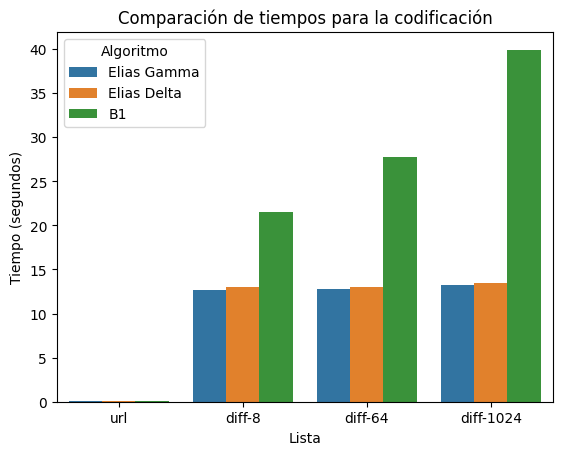

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Lista', y='Tiempo', hue='Método', data=dfencode)

plt.title('Comparación de tiempos para la codificación')
plt.xlabel('Lista')
plt.ylabel('Tiempo (segundos)')
plt.legend(title='Algoritmo')

plt.show()

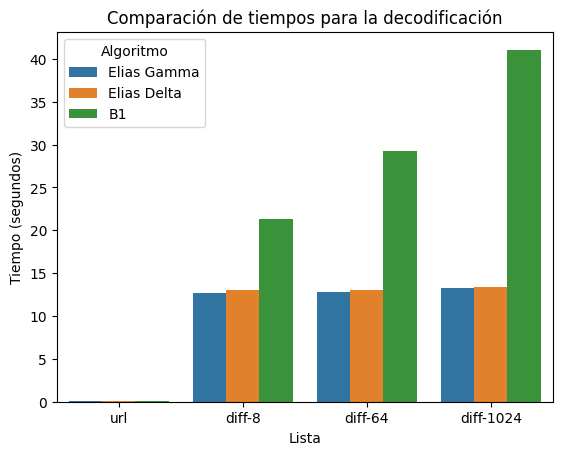

In [55]:
sns.barplot(x='Lista', y='Tiempo', hue='Método', data=dfdecode)

plt.title('Comparación de tiempos para la decodificación')
plt.xlabel('Lista')
plt.ylabel('Tiempo (segundos)')
plt.legend(title='Algoritmo')

plt.show()

## Inciso 4 - Comparación de Ratios de Compresión

In [56]:
import sys
import pandas as pd

data = [['Original','Original','url',sys.getsizeof(diffUrl)],
        ['Elias Delta','Encode','url',sys.getsizeof(urlDeltaElistaCod)],
        ['Elias Gamma','Encode','url',sys.getsizeof(urlGammaElistaCod)],
        ['B1','Encode','url',sys.getsizeof(sizeUrl)],
        ['Original','Original','diff-8',sys.getsizeof(diff8)],
        ['Elias Delta','Encode','diff-8',sys.getsizeof(DeltaE8listaCod)],
        ['Elias Gamma','Encode','diff-8',sys.getsizeof(GammaE8listaCod)],
        ['B1','Encode','diff-8',sys.getsizeof(size8)],
        ['Original','Original','diff-64',sys.getsizeof(diff64)],
        ['Elias Delta','Encode','diff-64',sys.getsizeof(DeltaE64listaCod)],
        ['Elias Gamma','Encode','diff-64',sys.getsizeof(GammaE64listaCod)],
        ['B1','Encode','diff-64',sys.getsizeof(size64)],
        ['Original','Original','diff-1024',sys.getsizeof(diff1024)],
        ['Elias Delta','Encode','diff-1024',sys.getsizeof(DeltaE1024listaCod)],
        ['Elias Gamma','Encode','diff-1024',sys.getsizeof(GammaE1024listaCod)],
        ['B1','Encode','diff-1024',sys.getsizeof(size1024)],
        ]
columns = ['Método','Tipo', 'Lista', 'Tamaño']

index_list = range(len(data)) 
dfsize = pd.DataFrame(data, columns=columns, index=index_list)
dfencodes = dfsize[dfsize['Tipo'] == 'Encode']
dfdecodes = dfsize[dfsize['Tipo'] == 'Original']
dfsize

,Método,Tipo,Lista,Tamaño
0,Original,Original,url,351064
1,Elias Delta,Encode,url,351064
2,Elias Gamma,Encode,url,351064
3,B1,Encode,url,351064
4,Original,Original,diff-8,89095160
5,Elias Delta,Encode,diff-8,89095160
6,Elias Gamma,Encode,diff-8,89095160
7,B1,Encode,diff-8,89095160
8,Original,Original,diff-64,89095160
9,Elias Delta,Encode,diff-64,89095160


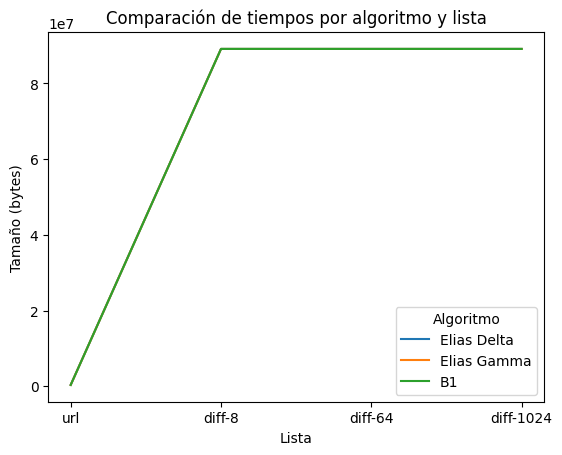

In [57]:
sns.lineplot(x='Lista', y='Tamaño', hue='Método', data=dfencodes)

plt.title('Comparación de tiempos por algoritmo y lista')
plt.xlabel('Lista')
plt.ylabel('Tamaño (bytes)')
plt.legend(title='Algoritmo')

plt.show()

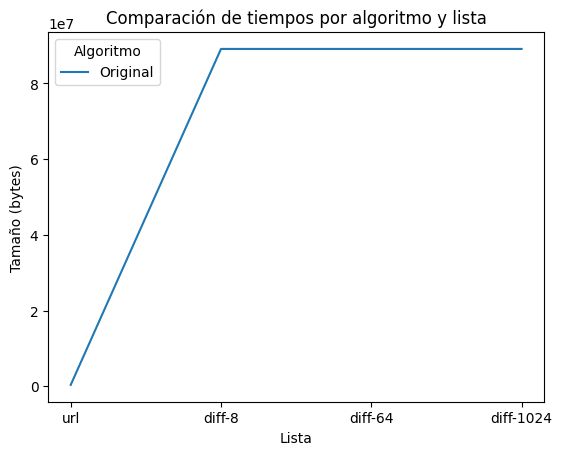

In [58]:
sns.lineplot(x='Lista', y='Tamaño', hue='Método', data=dfdecodes)

plt.title('Comparación de tiempos por algoritmo y lista')
plt.xlabel('Lista')
plt.ylabel('Tamaño (bytes)')
plt.legend(title='Algoritmo')

plt.show()

## Inciso 5 - Conclusiones

Dentro del análisis realizado podemos encontrar grandes diferencias de tiempo entre los distintos métodos de codificación y decodificación. De manera general, se observa que el método más veloz es el $Elias-\gamma$, seguido por poca diferencia del $Elias-\delta$.
El método que tomó constantemente más tiempo es el $B1$ lo cual se pudo observar en experimentos previos, conforme más complejas las instrucciones, más tarda el procesamiento.

Debido a diversas dificultades, no se pudo implementar el método $B2$, pero siguiendo la tendencia de los métodos, se podría esperar que este tarde exponencialmente más que el $B1$.

En el análisis del ratio de compresión, se observa que no hubo diferencias en el tamaño entre las listas comprimidas y la lista original, esto se puede deber a una errónea implementación de los diferentes tipos de compresión o a una mala manera de calcular los tamaños de cada lista.

## Bibliografía

- Elias, P. (1975). Universal codeword sets and representations of the integers. IEEE Transactions on Information Theory, 21(2), 194–203. https://doi.org/10.1109/tit.1975.1055349